In [8]:
from os import makedirs
from os.path import basename, dirname, exists, join, realpath
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import matplotlib
import sys

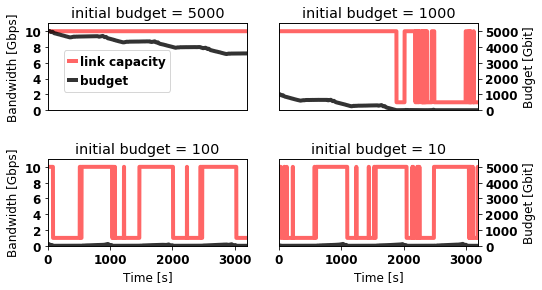

In [9]:


filedir = realpath("./")
inputdir = realpath(join(filedir, '../data/fig15/'))

def load_data(filename):
	df = pd.read_csv(filename, sep = ",", names=["data_transferred", "budget", "crnt_bw"])
	df = df.replace(10500, 10000)
	df = df.replace(1400, 1000)
	return df

def draw_graph(filename, ax, title, show_legend, show_left_cap, show_right_cap, show_bottom_cap):
	data = load_data(filename)
	limit = 3200
	budget = (data["budget"][:limit])
	crnt_bw = data["crnt_bw"][:limit] / 1000

	ax2 = ax.twinx()

	l2 = ax.plot(np.arange(0, len(crnt_bw)), crnt_bw, color="red", label="link capacity", alpha=0.6, lw=4)
	l3 = ax2.plot(np.arange(0, len(budget)), budget, color="black", label="budget", alpha=0.8, lw=4)
	
	if show_legend == True:
		lns = l2+l3
		labs = [l.get_label() for l in lns]
		ax.legend(lns, labs, loc="center left", bbox_to_anchor=(0.05, 0.45), ncol=1, handlelength=0.6, handletextpad=0.3)

	if show_left_cap == True:
		ax.set_ylabel("Bandwidth [Gbps]")
		ax.set_yticks(np.arange(0, 11, 2))
	else:
		ax.set_yticks([])
		
	if show_bottom_cap == True:
		ax.set_xlabel("Time [s]")
		ax.set_xticks(np.arange(0, limit, 1000))
	else:
		ax.set_xticks([])
		
	ax.set_ylim (0, 11)

	if show_right_cap == True:
		ax2.set_ylabel("Budget [Gbit]")
		ax2.set_yticks(np.arange(0, 5500, 1000))
	else:
		ax2.set_yticks([])
			
	ax.set_xlim(0, limit)		
	ax2.set_ylim(0, 5500)
	ax.set_title(title)

budget_10 = glob.glob(join(inputdir, "node030-2019-03-07-2338*"))
budget_100 = glob.glob(join(inputdir, "node030-2019-03-08-0101*"))
budget_1000 = glob.glob(join(inputdir, "node030-2019-03-08-0843*"))
budget_5000 = glob.glob(join(inputdir, "node030-2019-03-08-0959*"))

filenames = [budget_10, budget_100, budget_1000, budget_5000]
#print(filenames)

font = {'size': 12}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 4.5))

draw_graph(budget_5000[0], ax[0][0], "initial budget = 5000", True, True, False, False)
draw_graph(budget_1000[0], ax[0][1], "initial budget = 1000", False, False, True, False)
draw_graph(budget_100[0], ax[1][0], "initial budget = 100", False, True, False, True)
draw_graph(budget_10[0], ax[1][1], "initial budget = 10", False, False, True, True)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

plt.tight_layout()

plt.show()